In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from alp import const
from alp import plot_tools as pt

from alp import exp, models

In [3]:
def get_ntaus_per_POT(files, pid_mother=None):
    """
    Get the number of taus per POT
    """
    
    df = exp.load_events(files, as_dataframe=True)
    if pid_mother is not None:
        mask = df.mother_pid == pid_mother
    else:
        mask = np.ones(len(df), dtype=bool)
    # Apply the mask to weights
    weights = df.weights[mask]
    
    # Sum of weights in the masked region
    total_weight = weights.sum()
    
    # Number of simulated events (assuming max event_number is the total number of generated events)
    total_events = df.event_number.max()
    
    # Ratio of weighted events to total generated events
    ratio = total_weight / total_events
    
    # Statistical uncertainty on the sum of weights
    weight_uncertainty = np.sqrt((weights**2).sum())
    
    # Propagate uncertainty to the ratio (assuming total_events is exact)
    uncertainty = weight_uncertainty / total_events

    return ratio, uncertainty

def get_nparticles_per_POT(files, pid=431):
    """
    Get the number of taus per POT
    """
    
    df = exp.load_events(files, as_dataframe=True)
    
    mask = df.mother_pid == pid
    ratio = mask.sum()/df.event_number.max()
    
    print(f"{ratio:.2e}")

def get_taus(files):
    df = exp.load_events(files, as_dataframe=True)
    return df


def get_protons(files):
    df = exp.load_events(files, as_dataframe=True, apply_BR_weights=False)
    return df


In [4]:
def summarize_taus(name):
    print(f"\nTau summary for {name}")
    files = [f"pythia8_events/tau_events_{name}_{i}.txt" for i in range(0, 8)]
    ratio, unc = get_ntaus_per_POT(files, pid_mother=431)
    print(f"Taus/POT (Ds+): {ratio:.2e} +/- {unc:.2e}")
    ratio, unc = get_ntaus_per_POT(files, pid_mother=-431)
    print(f"Taus/POT (Ds-): {ratio:.2e} +/- {unc:.2e}")
    ratio, unc = get_ntaus_per_POT(files, pid_mother=100443)
    print(f"Taus/POT (psi(2S)): {ratio:.2e} +/- {unc:.2e}")
    ratio, unc = get_ntaus_per_POT(files)
    print(f"Taus/POT: {ratio:.2e} +/- {unc:.2e}")

In [6]:
# summarize_taus('120GeV_test')

# summarize_taus('120GeV_BothOn_pT1.0')

summarize_taus('120GeV_HardOff_pT0.0001_v2')
# summarize_taus('120GeV_HardOff_pT0.01')
# summarize_taus('120GeV_HardOff_pT1.0')

# summarize_taus('120GeV_SoftOff_pT0.01')
# summarize_taus('120GeV_SoftOff_pT1.0')


Tau summary for 120GeV_HardOff_pT0.0001_v2
Taus/POT (Ds+): 1.15e-07 +/- 1.15e-09
Taus/POT (Ds-): 1.56e-07 +/- 1.34e-09
Taus/POT (psi(2S)): 3.53e-09 +/- 4.84e-11
Taus/POT: 2.98e-07 +/- 1.77e-09


In [ ]:
summarize_taus('400GeV_soft')
summarize_taus('400GeV_hard')



Tau summary for 400GeV_HardOff_pT0.0001
Taus/POT (Ds+): 7.54e-07 +/- 8.52e-09
Taus/POT (Ds-): 8.99e-07 +/- 9.30e-09
Taus/POT (psi(2S)): 1.29e-08 +/- 2.67e-10
Taus/POT: 1.79e-06 +/- 1.26e-08


In [59]:
df = get_taus([f"pythia8_events/tau_events_30GeV_HardOff_pT0.0001_{i}.txt" for i in range(0, 8)])

In [66]:
alp = models.ALP(0.5, 1e8)

### Pythia8 tau events
JPARC_files  = [f"pythia8_events/tau_events_30GeV_HardOff_pT0.0001_{i}.txt" for i in range(0, 8)]

### Creating the experimental classes 
ND280      = exp.Experiment(JPARC_files, exp_dic=exp.ND280_exp, alp=alp, duplicate_taus=10)

/opt/homebrew/Caskroom/miniforge/base/envs/darknews/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:777: ComplexWarning: Casting complex values to real discards the imaginary part
  y[cond] = func(vals, *args, **kw)


In [71]:
ND280.event_rate

np.float64(0.474285381087096)

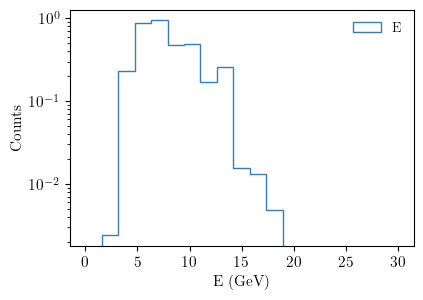

In [60]:
b = np.linspace(0, 30, 20)
_=plt.hist(df['E'], bins=b, weights=df['weights'], histtype='step', label='E')
plt.xlabel('E (GeV)')
plt.ylabel('Counts')
plt.legend()
plt.yscale('log')

# Proton stuff

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_63052/4183004247.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


3.4828478579999995

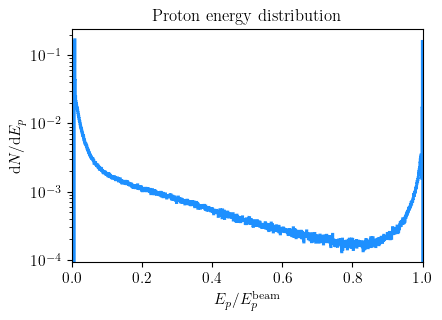

In [6]:
df = get_protons([f"pythia8_events/proton_events_120GeV_{i}.txt" for i in range(0, 8)])

bins = np.linspace(0.0, 1.0001, 1001, endpoint=True)
fig, ax = pt.std_fig()
_=ax.hist(df.E/120, weights=df.weights, bins=bins, histtype="step", color="dodgerblue", lw=2, label="120 GeV protons")

ax.set_xlabel(r"$E_{p}/E_{p}^{\mathrm{beam}}$")
ax.set_ylabel(r"$\mathrm{d}N/\mathrm{d}E_{p}$")
ax.set_title("Proton energy distribution")
ax.set_xlim(bins.min(), bins.max())
ax.set_yscale("log")
fig.tight_layout()

barn = 1e-24 # cm^2
sigma = 0.87*38e-3 * barn # cm^2
n = 1.78 * 6.23 * 1e23 # cm^-3
L = 95 # cm

# 1 - np.exp(-n*L*sigma)
n*L*sigma


In [ ]:
get_nparticles_per_POT([f"pythia8_events/tau_events_400GeV_{i}.txt" for i in range(0, 8)], pid=[15,-15])
get_nparticles_per_POT([f"pythia8_events/tau_events_NuMI_120GeV_v5_{i}.txt" for i in range(0, 8)], pid=[15,-15])
get_nparticles_per_POT([f"pythia8_events/tau_events_100GeV_{i}.txt" for i in range(0, 8)], pid=[15,-15])
get_nparticles_per_POT([f"pythia8_events/tau_events_80GeV_{i}.txt" for i in range(0, 8)], pid=[15,-15])